In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
from pandas import ExcelFile

In [5]:
df = pd.read_excel('TCM Historical Data.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,77652,77391,78783,77130,247.25K,-0.0100
1,2021-07-02,78696,77391,78696,76957,333.85K,0.0134
2,2021-07-05,79130,78696,79130,77391,560.40K,0.0055
3,2021-07-06,77130,79130,79652,77130,323.38K,-0.0253
4,2021-07-07,79130,77391,79130,73043,629.74K,0.0259


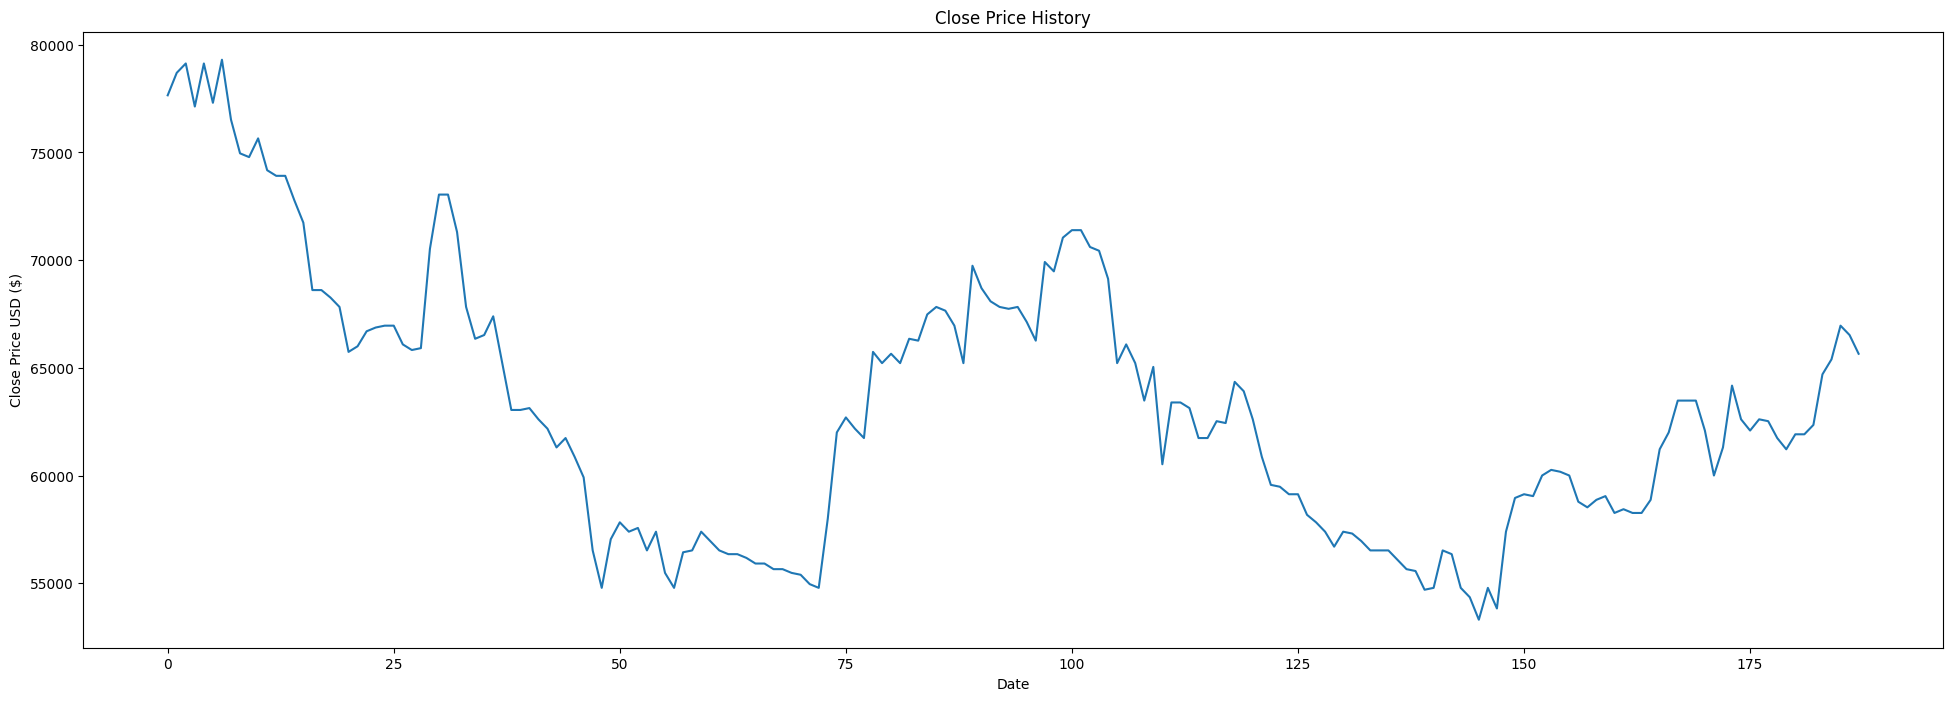

In [6]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [7]:
# Create a new dataframe with only the 'Price column 
data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset)) - 62)

training_data_len

126

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.93646154],
       [0.97661538],
       [0.99330769],
       [0.91638462],
       [0.99330769],
       [0.92307692],
       [1.        ],
       [0.893     ],
       [0.83280769],
       [0.82611538],
       [0.85953846],
       [0.80269231],
       [0.79265385],
       [0.79265385],
       [0.74919231],
       [0.70903846],
       [0.58865385],
       [0.58865385],
       [0.57526923],
       [0.55853846],
       [0.47826923],
       [0.48830769],
       [0.51507692],
       [0.52176923],
       [0.52511538],
       [0.52511538],
       [0.49165385],
       [0.48161538],
       [0.48496154],
       [0.66223077],
       [0.75919231],
       [0.75919231],
       [0.69230769],
       [0.55853846],
       [0.50169231],
       [0.50838462],
       [0.54180769],
       [0.45819231],
       [0.37457692],
       [0.37457692],
       [0.37792308],
       [0.35788462],
       [0.34115385],
       [0.30769231],
       [0.32442308],
       [0.291     ],
       [0.25419231],
       [0.123

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

predictions_days = 60

for i in range(predictions_days, len(train_data)):
    x_train.append(train_data[i-predictions_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= (predictions_days + 1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.93646154, 0.97661538, 0.99330769, 0.91638462, 0.99330769,
       0.92307692, 1.        , 0.893     , 0.83280769, 0.82611538,
       0.85953846, 0.80269231, 0.79265385, 0.79265385, 0.74919231,
       0.70903846, 0.58865385, 0.58865385, 0.57526923, 0.55853846,
       0.47826923, 0.48830769, 0.51507692, 0.52176923, 0.52511538,
       0.52511538, 0.49165385, 0.48161538, 0.48496154, 0.66223077,
       0.75919231, 0.75919231, 0.69230769, 0.55853846, 0.50169231,
       0.50838462, 0.54180769, 0.45819231, 0.37457692, 0.37457692,
       0.37792308, 0.35788462, 0.34115385, 0.30769231, 0.32442308,
       0.291     , 0.25419231, 0.12376923, 0.05688462, 0.14380769,
       0.17392308, 0.15719231, 0.16388462, 0.12376923, 0.15719231,
       0.08361538, 0.05688462, 0.12042308, 0.12376923, 0.15719231])]
[0.14049999999999985]

[array([0.93646154, 0.97661538, 0.99330769, 0.91638462, 0.99330769,
       0.92307692, 1.        , 0.893     , 0.83280769, 0.82611538,
       0.85953846, 0.80269231, 0.79

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
66/66 [==============================] - 3s 13ms/step - loss: 0.0291
Epoch 2/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0108
Epoch 3/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0109
Epoch 4/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0083
Epoch 5/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0136
Epoch 6/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0094
Epoch 7/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0083
Epoch 8/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0075
Epoch 9/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0072
Epoch 10/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0065
Epoch 11/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0058
Epoch 12/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0061
Epoch 13/25
66/66 [==================

In [11]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - predictions_days: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(predictions_days, len(test_data)):
    x_test.append(test_data[i-predictions_days:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 17ms/step


1242.686840163357

C:\Users\DELL\AppData\Local\Temp\ipykernel_41608\2294235708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


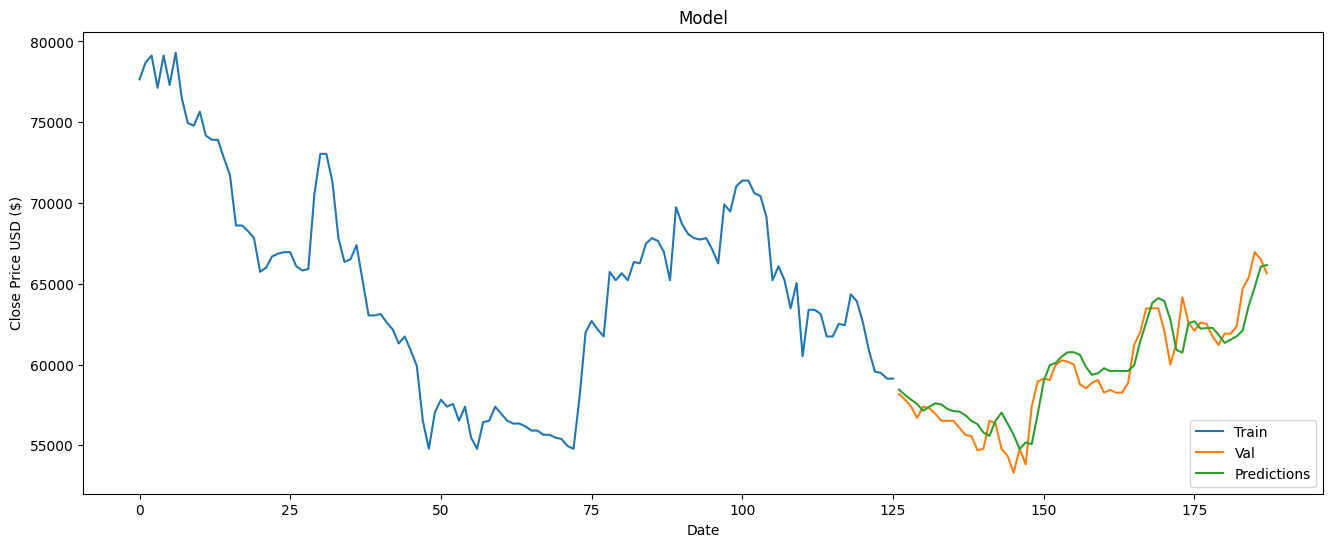

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()